# Análise Exploratória

## Análise: Perfil Demográfico dos Clientes

### Objetivo

Identificar o perfil predominante dos clientes e verificar se existem diferenças demográficas entre os que aceitaram ou não a campanha de marketing.

### Variáveis Analisadas

- age_range (faixas etárias)

- marital (estado civil)

- job (ocupação)

- education (nível de escolaridade)

### Metodologia

- Gráficos de barras (CountPlot) para distribuição geral das categorias.

- Tabelas com proporções (%) para facilitar a leitura dos dados.

- Análise adicional da proporção de respostas positivas (y = yes) dentro de cada grupo.

In [56]:
from IPython.display import display, HTML

def plot_cat(df, col, figsize=(8,5), rotation=None):

    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df,
                       x=col,
                       order=df[col].value_counts().index,
                       hue=col,
                       legend=False,
                       palette= 'rocket'
                       )
    plt.title(f'{col} distribution', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom')

    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

    freq_table = df[col].value_counts().to_frame('Count')
    freq_table['Percent'] = (freq_table['Count']/ freq_table['Count'].sum()*100).round(2).astype(str) + '%'

    display(freq_table)

    #Clientes que disseram "sim" ao produto têm um perfil distinto dos que disseram "não"?

    tab_with_y = (df.groupby(col)['y']
                  .value_counts(normalize=True)
                  .rename('Proportion')
                  .reset_index()
                  )
    
    tab_with_y['Proportion'] = (tab_with_y['Proportion']* 100).round(2).astype(str) + '%'

#HTML e index=False, para deixar a tabela de forma mais padrao dentro do notebook
    display(HTML(tab_with_y.to_html(index=False)))

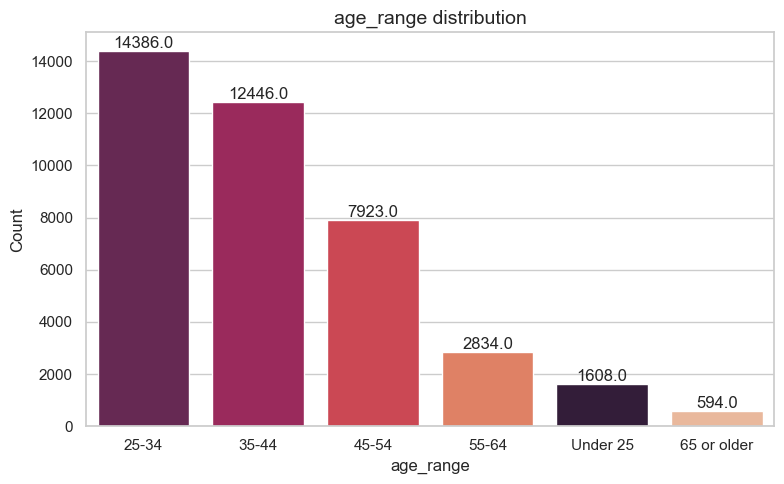

,Count,Percent
age_range,,
25-34,14386,36.15%
35-44,12446,31.28%
45-54,7923,19.91%
55-64,2834,7.12%
Under 25,1608,4.04%
65 or older,594,1.49%


age_range,y,Proportion
Under 25,no,79.35%
Under 25,yes,20.65%
25-34,no,88.22%
25-34,yes,11.78%
35-44,no,91.49%
35-44,yes,8.51%
45-54,no,91.25%
45-54,yes,8.75%
55-64,no,84.79%
55-64,yes,15.21%


In [57]:
#A variável age foi previamente transformada em faixas etárias para facilitar a interpretação.
plot_cat(df_clean, 'age_range')

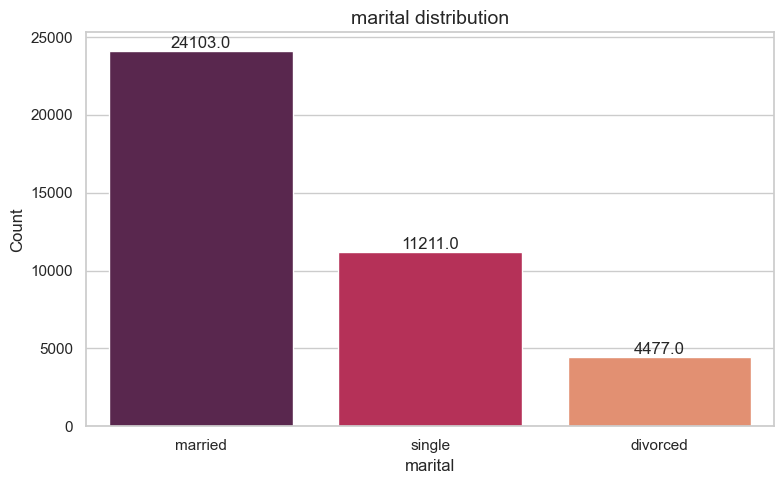

,Count,Percent
marital,,
married,24103,60.57%
single,11211,28.17%
divorced,4477,11.25%


marital,y,Proportion
divorced,no,89.61%
divorced,yes,10.39%
married,no,89.81%
married,yes,10.19%
single,no,86.03%
single,yes,13.97%


In [58]:
plot_cat(df_clean, 'marital')

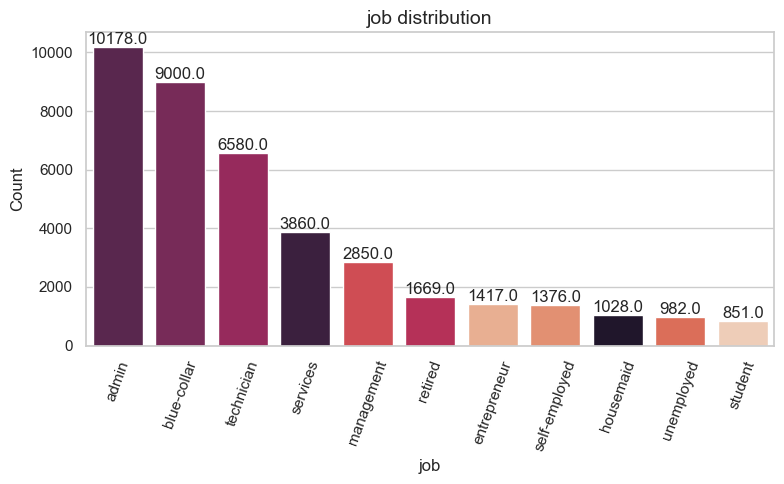

,Count,Percent
job,,
admin,10178,25.58%
blue-collar,9000,22.62%
technician,6580,16.54%
services,3860,9.7%
management,2850,7.16%
retired,1669,4.19%
entrepreneur,1417,3.56%
self-employed,1376,3.46%
housemaid,1028,2.58%


job,y,Proportion
admin,no,87.03%
admin,yes,12.97%
blue-collar,no,93.12%
blue-collar,yes,6.88%
entrepreneur,no,91.53%
entrepreneur,yes,8.47%
housemaid,no,89.98%
housemaid,yes,10.02%
management,no,88.63%
management,yes,11.37%


In [59]:
plot_cat(df_clean, 'job', rotation=70)

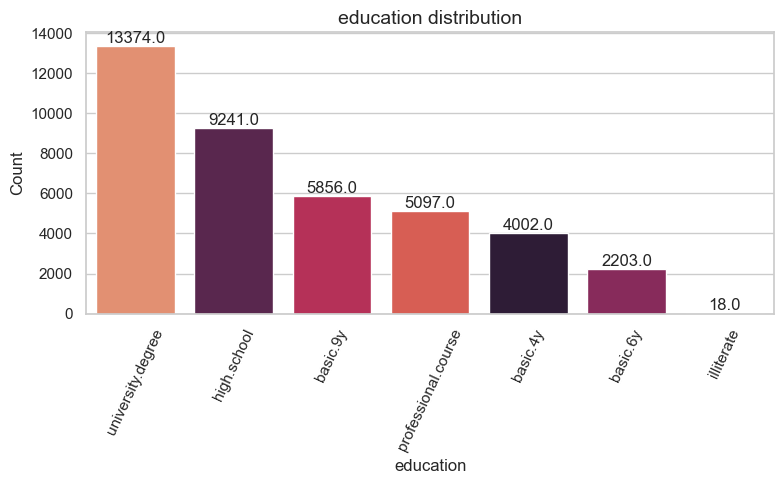

,Count,Percent
education,,
university.degree,13374,33.61%
high.school,9241,23.22%
basic.9y,5856,14.72%
professional.course,5097,12.81%
basic.4y,4002,10.06%
basic.6y,2203,5.54%
illiterate,18,0.05%


education,y,Proportion
basic.4y,no,89.71%
basic.4y,yes,10.29%
basic.6y,no,91.83%
basic.6y,yes,8.17%
basic.9y,no,92.2%
basic.9y,yes,7.8%
high.school,no,89.1%
high.school,yes,10.9%
illiterate,no,77.78%
illiterate,yes,22.22%


In [60]:
plot_cat(df_clean, 'education', rotation=65)

## Principais Insights

### Faixa Etária

- Clientes de 25–44 anos representam mais da metade da base.

- Apesar de serem minoria (menos de 6%), os grupos 55+ apresentaram maior taxa de aceitação, principalmente:

- 65+ anos: 46,6% disseram "sim"

- 55–64 anos: 15,2% disseram "sim"

- Faixas mais jovens (25–44) apresentaram taxas entre 8% e 12% de aceitação.

### Estado Civil

- Casados: grupo mais numeroso (60%).

- Solteiros: maior taxa de aceitação (13,9%).

- Casados e divorciados têm aceitação semelhante (~10%).

### Ocupação

- Ocupações mais comuns: admin, blue-collar, technician, services.

- As maiores taxas de aceitação foram observadas em:

- student (31,0%)

- retired (25,3%)

- unemployed (14,5%)

- blue-collar tem grande presença (22,6%), mas baixa taxa de aceitação (6,8%).

### Escolaridade

- 33,6% dos clientes possuem nível universitário, seguidos pelo ensino médio (23,2%).

- Maiores taxas de aceitação:

- illiterate (22,2%) – embora com poucos registros

- university.degree (13,8%)

- professional.course (11,3%)

- Escolaridade básica mostrou baixa taxa de aceitação.

## Interpretação

- As faixas etárias mais jovens são maioria, mas têm menor aceitação — o que indica que idade avançada pode estar correlacionada a maior aceitação, embora com menor representatividade.

- Solteiros mostraram maior propensão a aceitar o produto, o que pode sugerir maior interesse ou abertura a novos serviços financeiros.

- Profissões como student, retired, e unemployed — apesar de menos frequentes — apresentaram alta taxa de aceitação, sugerindo potencial de foco em campanhas futuras.

- Níveis de escolaridade mais altos (universitário ou curso técnico) demonstraram melhor desempenho na aceitação, enquanto a base com educação básica mostrou menor engajamento.

## Conclusão

- Clientes com perfil mais jovem, casados e trabalhadores braçais são maioria, mas apresentam menores taxas de aceitação.

- Já perfis com menor representatividade, como student, retired e pessoas com formação universitária, mostram maior interesse na oferta.

- Sugestão: campanhas futuras poderiam considerar segmentação por perfil demográfico, priorizando públicos com maior propensão de aceitação.

# Análise: Comunicação com o Cliente

## Objetivo

Investigar se o número de contatos realizados com o cliente e o histórico de campanhas anteriores  influenciam na resposta positiva à campanha atual.

## Variáveis Analisadas 

- campaign (número de contatos durante a campanha atual)
  
- pdays (histórico de contatos em campanhas anteriores)

- excessive_calls (chamadas excessivas de contatos anteriores)
  
## Metodologia

- Gráficos de barras (CountPlot) para distribuição geral das categorias.
  
- Tabelas com proporções (%) para facilitar a leitura dos dados.

- Análise adicional da proporção de respostas positivas (y = yes) dentro de cada grupo.




In [61]:
def tab_proportion(df, col):

    freq_table = df[col].value_counts().to_frame('Count')
    freq_table['Percent'] = (freq_table['Count']/ freq_table['Count'].sum()*100).round(2).astype(str) + '%'

    display(freq_table)

    #Clientes que disseram "sim" ao produto têm um perfil distinto dos que disseram "não"?

    tab_with_y = (df.groupby(col)['y']
                  .value_counts(normalize=True)
                  .rename('Proportion')
                  .reset_index()
                  )
    
    tab_with_y['Proportion'] = (tab_with_y['Proportion']* 100).round(2).astype(str) + '%'

#HTML e index=False, para deixar a tabela de forma mais padrao dentro do notebook
    display(HTML(tab_with_y.to_html(index=False)))

In [62]:
tab_proportion(df_clean, 'campaign')

,Count,Percent
campaign,,
1,17032,42.8%
2,10223,25.69%
3,5158,12.96%
4,2562,6.44%
5,1558,3.92%
6,947,2.38%
7,607,1.53%
8,385,0.97%
9,268,0.67%


campaign,y,Proportion
1,no,87.03%
1,yes,12.97%
2,no,88.49%
2,yes,11.51%
3,no,89.18%
3,yes,10.82%
4,no,90.44%
4,yes,9.56%
5,no,92.43%
5,yes,7.57%


In [63]:
def plot_cat_with_hue(df, col, figsize=(8,5), rotation=None, hue=None):

    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df,
                       x=col,
                       order=df[col].value_counts().index,
                       hue=hue,
                       legend=True,
                       palette= 'rocket'
                       )
    plt.title(f'{col} distribution', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom')

    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()


In [64]:
df_campaign = df_clean[['campaign', 'y']].copy()

df_campaign['campaign_range'] = pd.cut(
    df_campaign['campaign'],
    bins=[0, 2, 4, 6, 10, float('inf')],
    labels=['1-2', '3-4', '5-6', '7-10', '11 or more']
)

print(df_campaign.head())


   campaign   y campaign_range
0         1  no            1-2
1         1  no            1-2
2         1  no            1-2
3         1  no            1-2
4         1  no            1-2


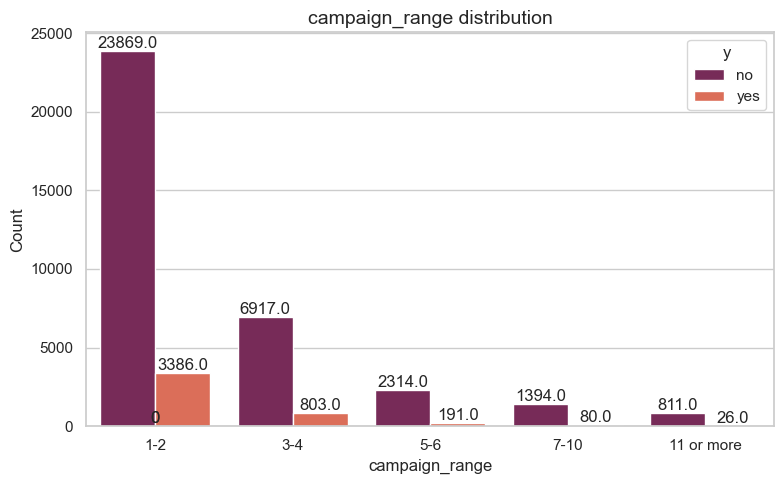

In [65]:
plot_cat_with_hue(df_campaign, 'campaign_range', hue='y') 

In [66]:
from IPython.display import display, HTML

def tab_with_y(df, col):

    tab_with_y = (df.groupby(col)['y']
                  .value_counts(normalize=True)
                  .rename('Proportion')
                  .reset_index()
                  )
    
    tab_with_y['Proportion'] = (tab_with_y['Proportion']* 100).round(2).astype(str) + '%'

    display(HTML(tab_with_y.to_html(index=False)))

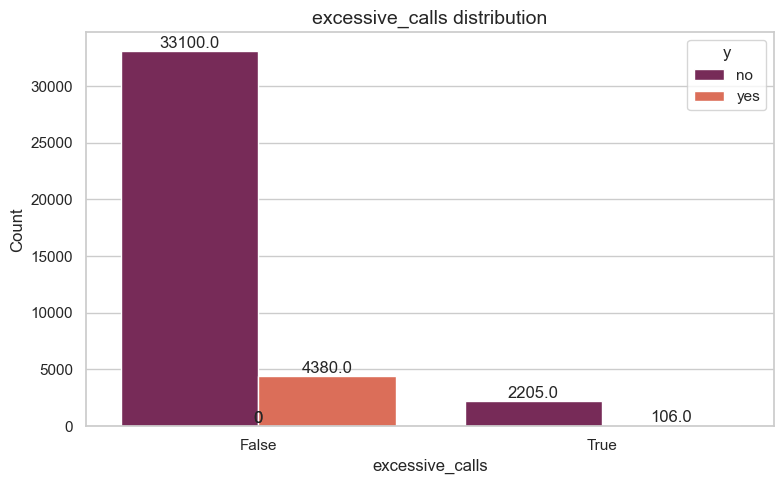

In [67]:
plot_cat_with_hue(df_clean, 'excessive_calls', hue='y' )

In [68]:
tab_with_y(df_clean, 'excessive_calls')

excessive_calls,y,Proportion
False,no,88.31%
False,yes,11.69%
True,no,95.41%
True,yes,4.59%


In [69]:
tab_proportion(df_clean, 'pdays')

,Count,Percent
pdays,,
999,38335,96.34%
3,421,1.06%
6,396,1.0%
4,113,0.28%
9,62,0.16%
7,58,0.15%
2,58,0.15%
12,56,0.14%
10,48,0.12%


pdays,y,Proportion
0,yes,66.67%
0,no,33.33%
1,no,68.0%
1,yes,32.0%
2,yes,60.34%
2,no,39.66%
3,yes,68.65%
3,no,31.35%
4,yes,51.33%
4,no,48.67%


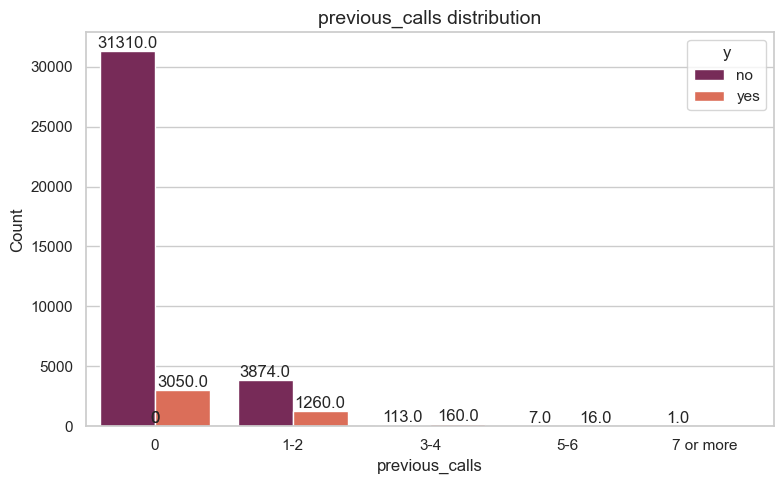

In [70]:
plot_cat_with_hue(df_clean, 'previous_calls', hue='y') 

In [71]:
tab_with_y(df_clean, 'previous_calls')

previous_calls,y,Proportion
0,no,91.12%
0,yes,8.88%
1-2,no,75.46%
1-2,yes,24.54%
3-4,yes,58.61%
3-4,no,41.39%
5-6,yes,69.57%
5-6,no,30.43%
7 or more,no,100.0%
7 or more,yes,0.0%


# Principais Insights

## Campaign

- A maioria dos clientes foi contatada de 1 a 2 vezes (68,49% no total).

- As maiores taxas de aceitação ocorreram entre 1 e 4 contatos:

  - 1 contato: 12,97%
  - 2 contatos: 11,51%
  - 3 contatos: 10,82%
  - 4 contatos: 9,56%
    
- Acima de 6 chamadas: taxa cai para 4,59%

- Para facilitar a visualização no gráfico, foram criadas faixas (bins): 1–2, 3–4, 5–6, 7–10, 11+. A maior aceitação continua nas faixas iniciais.

### Conclução

 Quanto maior o número de contatos, menor a taxa de aceitação, sugerindo que abordagens    mais assertivas nas primeiras tentativas são mais eficazes. Esse padrão reforça a         importância de estratégias de comunicação eficientes logo nos primeiros contatos com o    cliente.

## Pdays

 - Devido à forte concentração no valor 999 — que representa clientes nunca contatados em    campanhas anteriores, foi criada a variável derivada excessive_calls, categorizando      se houve ou não excesso de chamadas anteriores (acima de 6).
 
 -  Cerca de 96,34% dos clientes nunca haviam sido contatados anteriormente (pdays =      999). A taxa de aceitação desse grupo foi de apenas 9,27%.

 - Entre os clientes que já haviam sido contatados, os melhores resultados de aceitação foram observados em valores baixos de pdays:

   - pdays = 6: 70,71%
   - pdays = 5: 63.04%
   - pdays = 3: 68,65%


 - A categoria excessive_calls demonstrou que clientes com mais de 6 contatos anteriores apresentaram apenas 4,59% de aceitação, enquanto os demais atingiram 11,69%.

 - O valor pdays = 0 aparece em apenas 0,04% dos casos, e pode representar clientes contatados novamente no mesmo dia, sendo necessário cuidado na interpretação.

### Conclução

 A presença de contatos anteriores recente e pontual pode ter efeito positivo na aceitação, desde que não haja excesso de ligações. Chamadas excessivas tendem a diminuir substancialmente a probabilidade de resposta positiva.


# Análise: Duração da Ligação

## Objetivo
Analisar se a duração da ligação (duration) está associada à resposta positiva do cliente (y).

**Importante:** esta variável não deve ser usada como preditora em modelos de machine learning, pois seu valor é conhecido somente após o término da chamada.
Essa variável foi utilizada apenas para fins exploratórios, visando entender se há associação com a resposta positiva.

## Variável Analisada:
    
- duration (duração em segundos da ligação) 

## Metodologia

Inicialmente, foram aplicadas as tabelas de:

 - Frequência absoluta e relativa (value_counts)

 - Proporção de aceitação

No entanto, devido à ampla dispersão dos valores de duration, a análise direta dessa variável mostrou-se pouco eficiente para interpretação visual. 
Por isso, foi criada a variável derivada duration_range, com faixas categóricas de duração para facilitar a análise gráfica e tabular. 
As faixas utilizadas foram, por exemplo: '1-2', '3-5', '5-10', '10-20', '20+' (valores em minutos convertidos de segundos).

Foi construído um gráfico de barras (countplot) com hue='y', além da aplicação da tabela de proporção por faixa de duração.

In [72]:
tab_proportion(df_clean, 'duration')

,Count,Percent
duration,,
85,167,0.42%
90,166,0.42%
87,159,0.4%
136,159,0.4%
111,157,0.39%
...,...,...
1326,1,0.0%
1380,1,0.0%
1804,1,0.0%


duration,y,Proportion
0,no,100.0%
1,no,100.0%
2,no,100.0%
3,no,100.0%
4,no,100.0%
5,no,100.0%
6,no,100.0%
7,no,100.0%
8,no,100.0%
9,no,100.0%


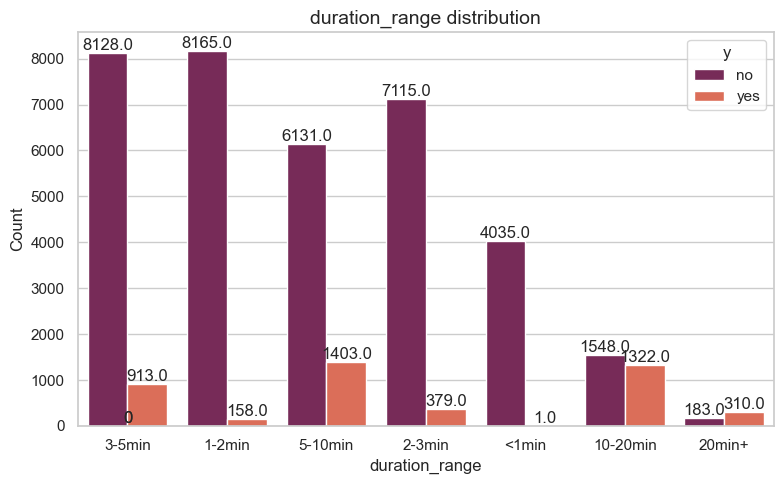

In [73]:
plot_cat_with_hue(df_clean, 'duration_range', hue='y') 

In [74]:
tab_with_y(df_clean, 'duration_range')

duration_range,y,Proportion
<1min,no,99.98%
<1min,yes,0.02%
1-2min,no,98.1%
1-2min,yes,1.9%
2-3min,no,94.94%
2-3min,yes,5.06%
3-5min,no,89.9%
3-5min,yes,10.1%
5-10min,no,81.38%
5-10min,yes,18.62%


## Principais Insights

- Distribuição das ligações: A maior parte das chamadas concentrou-se nas faixas:
  - '1-2' minutos
  - '3-5' minutos
  - '5-10' minutos

- Taxas de aceitação por faixa de duração:

  - 3-5 min: 10,1%
  - 5-10 min: 18,62%
  - 10-20 min: 46,0%
  - 20+ min: 62,88%

Apesar das faixas mais longas representarem um número menor de clientes, os dados indicam que quanto maior a duração da ligação, maior a probabilidade de aceitação do produto.

## Conclusão

Há uma associação positiva clara entre a duração da ligação e a resposta positiva do cliente. 
Esse resultado pode indicar que, quanto mais tempo o cliente permanece na linha, maior o engajamento e interesse, refletindo em maior taxa de conversão.
Contudo, reforça-se que essa variável só é válida para análise explicativa e não preditiva.

# Análise: Características Financeiras

## Objetivo

Avaliar se atributos financeiros, como inadimplência, empréstimo para habitação e empréstimo pessoal, possuem relação significativa com a aceitação da campanha.

**Observação:** Embora a pergunta mencione também escolaridade e o índice de confiança do consumidor (cons.conf.idx), esses aspectos foram (ou serão) analisados separadamente em seções mais adequadas do relatório. Portanto, esta seção foca exclusivamente nas variáveis default, housing e loan.

## Metodologia

- As três variáveis analisadas (default, housing, loan) são binárias (sim/não).
- Para facilitar a interpretação, os dados foram convertidos em valores binários (0 ou 1), e posteriormente foram calculadas as médias para os grupos de clientes que aceitaram e não aceitaram a oferta. Isso possibilita observar, em termos percentuais, quantos clientes em cada grupo possuem empréstimos, dívidas ou financiamentos em aberto.

In [75]:
df_bin = df_clean[['default', 'housing', 'loan', 'y']].copy()
bin_cols = ['default', 'housing', 'loan']
df_bin[bin_cols] = df_bin[bin_cols].apply(lambda x: x.map({'yes':1, 'no':0}))

In [76]:
bin_cols_mean = df_bin[bin_cols].mean().to_frame('mean (%)')
bin_cols_mean['mean (%)'] = (bin_cols_mean['mean (%)'] * 100).round(2).astype(str) + '%'

In [77]:
mean_by_y= df_bin.groupby('y')[bin_cols].mean().T
mean_by_y.columns = ['Did not accept (%)', 'Accepted (%)']
mean_by_y['Did not accept (%)'] = (mean_by_y['Did not accept (%)'] * 100).round(2).astype(str) + '%'
mean_by_y['Accepted (%)'] = (mean_by_y['Accepted (%)'] * 100).round(2).astype(str) + '%'
display(mean_by_y)

,Did not accept (%),Accepted (%)
default,0.01%,0.0%
housing,53.5%,55.35%
loan,15.59%,15.11%


# Principais Insights

### Default:

- A proporção de clientes com inadimplência é extremamente baixa em ambos os grupos. Apenas 0,01% dos clientes que não aceitaram estavam inadimplentes, e nenhum dos clientes que aceitaram apresentava essa condição.
- Esse resultado pode indicar baixa incidência de inadimplência no conjunto de dados ou possível ausência de atualização precisa nessa variável.

### Housing:

- Clientes com financiamento de habitação estão ligeiramente mais representados entre os que aceitaram a campanha (55,35%) do que entre os que não aceitaram (53,50%).
- Embora a diferença seja pequena, pode sugerir que pessoas com esse tipo de compromisso financeiro estejam mais abertas a novas ofertas bancárias.

### Loan:

- A presença de empréstimo pessoal entre os clientes é semelhante nos dois grupos, com leve redução na aceitação (15,11% contra 15,59%).
- Neste caso, não parece haver uma associação clara entre possuir empréstimo e a decisão do cliente.

## Conclusão

As variáveis housing e loan apresentaram proporções muito próximas entre os grupos, não sendo possível afirmar com segurança que há uma associação forte entre esses atributos e a aceitação da campanha.
Já a variável default apresentou proporções praticamente nulas, o que limita qualquer tipo de inferência relevante. Isso pode ocorrer tanto por uma baixa ocorrência real de inadimplência quanto por sub-registro ou omissão nos dados.

Sugestão: incluir uma breve observação metodológica no relatório indicando a possibilidade de viés por ausência de dados na variável default.!!!!!!!!!!!!!!

# Fatores Econômicos

## Objetivo

Analisar se o cenário econômico no momento da ligação — representado por variáveis como Euribor Tax, Employment Variation Rate e Consumer Confidence Index — impactaram de forma significativa na aceitação da campanha (y).

Embora o dataset contenha diversas variáveis macroeconômicas, esta análise foca nas três mais representativas, tanto pelo seu significado econômico quanto pelo potencial impacto direto na tomada de decisão do cliente.

## Metodologia

- Gráfico violinplot: mostra a distribuição das variáveis em relação à resposta (y)

- Tabela de aceitação: groupby da variável com y, usando normalize=True para gerar proporções percentuais.

- Quando necessário, foram criadas variáveis derivadas (com faixas) para facilitar a visualização e interpretação, especialmente nos casos em que os dados originais eram muito dispersos ou apresentavam alta cardinalidade.

In [78]:
def plot_violin(df, col1, col2, figsize=(8,5)):

    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    sns.violinplot(data=df,
                   y=col1,
                   x='y',
                   legend=True,
                   palette='rocket')
    plt.title(f"{col1} rates", fontsize = 14)
    plt.ylabel('Rates', fontsize=12)
    plt.xlabel('Positive or negative answer', fontsize=12)
    plt.tight_layout()
    plt.show()


    #Clientes que disseram "sim" ao produto têm um perfil distinto dos que disseram "não"?

    tab_with_y_violin = (df.groupby(col2)['y']
                  .value_counts(normalize=True)
                  .rename('Proportion')
                  .reset_index()
                  )
    
    tab_with_y_violin['Proportion'] = (tab_with_y_violin['Proportion']* 100).round(2).astype(str) + '%'

#HTML e index=False, para deixar a tabela de forma mais padrao dentro do notebook
    display(HTML(tab_with_y_violin.to_html(index=False)))

In [79]:
df_euribor = df_clean[['euribor3m', 'y']].copy()

df_euribor['euribor_range'] = pd.cut(
    df_euribor['euribor3m'],
    bins=[0, 1.5, 3, 4.5, 6],
    labels=['Low', 'Moderate', 'High', 'Very High']
)

print(df_euribor.head())

   euribor3m   y euribor_range
0      4.857  no     Very High
1      4.857  no     Very High
2      4.857  no     Very High
3      4.857  no     Very High
4      4.857  no     Very High


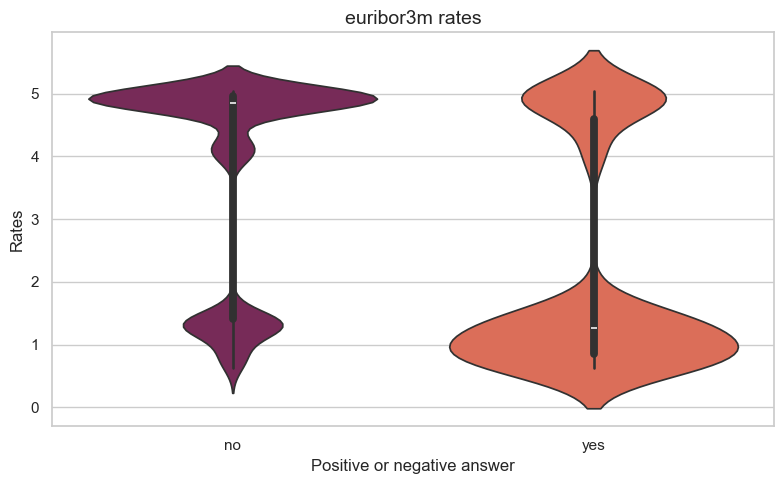

euribor_range,y,Proportion
Low,no,76.07%
Low,yes,23.93%
Moderate,no,54.74%
Moderate,yes,45.26%
High,no,94.92%
High,yes,5.08%
Very High,no,95.16%
Very High,yes,4.84%


In [80]:
plot_violin(df_euribor, col1='euribor3m', col2='euribor_range')

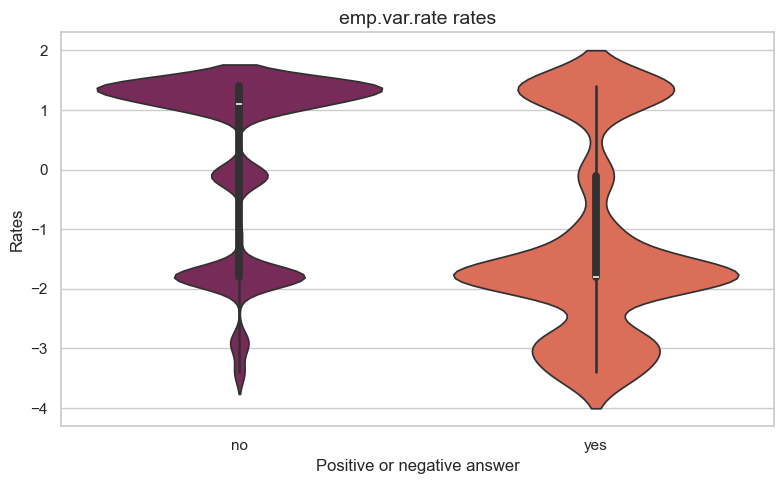

emp.var.rate,y,Proportion
-3.4,no,57.45%
-3.4,yes,42.55%
-3.0,yes,51.22%
-3.0,no,48.78%
-2.9,no,64.02%
-2.9,yes,35.98%
-1.8,no,84.09%
-1.8,yes,15.91%
-1.7,yes,51.54%
-1.7,no,48.46%


In [81]:
plot_violin(df_clean, col1='emp.var.rate', col2='emp.var.rate')

In [82]:
df_clean['cons.conf.idx'].describe()

count    39791.000000
mean       -40.521301
std          4.627854
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

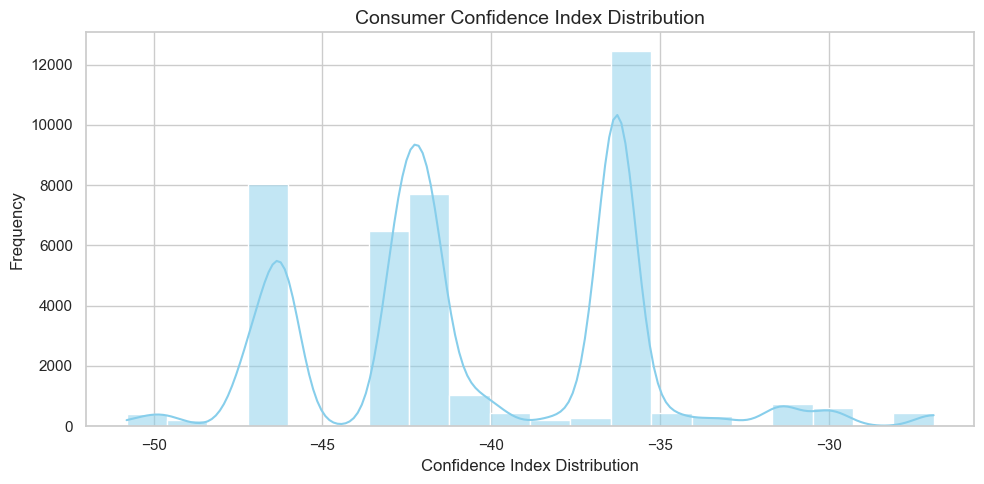

In [83]:
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['cons.conf.idx'], bins=20, kde=True, color='skyblue')
plt.title('Consumer Confidence Index Distribution', fontsize=14)
plt.xlabel('Confidence Index Distribution', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
df_cons_conf_idx = df_clean[['cons.conf.idx', 'y']].copy()

df_cons_conf_idx['cons.conf.idx_range'] = pd.cut(
    df_cons_conf_idx['cons.conf.idx'],
    bins=[-float('inf'), -47, -43, -39, -36, -33, float('inf')],
    labels=['<-47', '-47 a -43', '-43 a -39', '-39 a -36', '-36 a -33', '> -33']
)

print(df_cons_conf_idx.head())

   cons.conf.idx   y cons.conf.idx_range
0          -36.4  no           -39 a -36
1          -36.4  no           -39 a -36
2          -36.4  no           -39 a -36
3          -36.4  no           -39 a -36
4          -36.4  no           -39 a -36


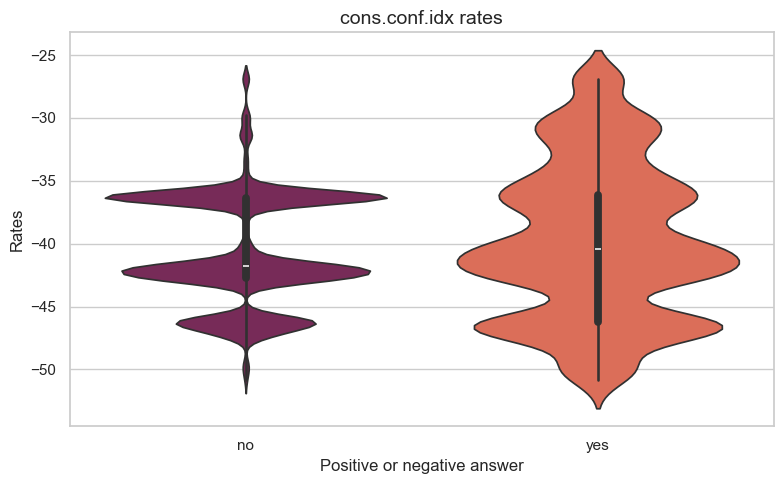

cons.conf.idx_range,y,Proportion
<-47,no,76.64%
<-47,yes,23.36%
-47 a -43,no,90.93%
-47 a -43,yes,9.07%
-43 a -39,no,90.77%
-43 a -39,yes,9.23%
-39 a -36,no,94.21%
-39 a -36,yes,5.79%
-36 a -33,yes,50.85%
-36 a -33,no,49.15%


In [85]:
plot_violin(df_cons_conf_idx, col1='cons.conf.idx', col2='cons.conf.idx_range') 

# Principais Insights

Taxa Euribor a 3 Meses (euribor3m)

Transformações:
Criada a variável euribor3m_range com os seguintes bins:

[0, 1.5, 3, 4.5, 6]

Labels: Low, Moderate, High, Very High

### Análise visual (violinplot com euribor3m original):

A maior concentração de rejeições está entre 4.5% e 5.5%, com distribuição densa e achatada.

Já as respostas positivas aparecem principalmente com taxas abaixo de 2%, especialmente entre 0.6% e 1.5%.

Conclusão visual: taxas mais baixas de juros estão associadas a maior aceitação.
Tabela de aceitação (euribor3m_range):

Faixa	Aceitação (%)	Rejeição (%)
Low	23.93%	76.07%
Moderate	45.26%	54.74%
High	5.08%	94.92%
Very High	4.84%	95.16%

Conclusão: Há uma associação clara entre juros baixos (Euribor) e maior taxa de sucesso da campanha.

Variação da Taxa de Emprego (emp.var.rate)

Análise visual (violinplot com variável original):

Rejeições se concentram fortemente entre 0.9 e 1.7, com distribuição densa e achatada.

As respostas positivas, por outro lado, aparecem majoritariamente entre -2.4 e -1.1, com concentrações secundárias entre -4 e -2.4, e também entre 0.5 a 2.0, embora com menor intensidade.

Tabela de aceitação:

Valor	Aceitação (%)	Rejeição (%)
-3.0	51.22%	48.78%
-3.4	42.55%	57.45%
-1.1	47.14%	52.86%
1.1	3.16%	96.84%
1.4	5.35%	94.65%
-0.1	6.3%	93.7%

Conclusão: Taxas negativas de variação de emprego estão mais associadas a respostas positivas. Já valores positivos entre 1 e 2 parecem indicar menor aceitação da campanha.

### Índice de Confiança do Consumidor (cons.conf.idx)

Transformações Realizadas

Distribuição dos dados brutos (describe e histplot)

Foi realizada uma análise exploratória com describe() e histplot() para entender a dispersão dos valores.

Verificou-se uma grande quantidade de valores negativos, o que é esperado para esse índice.

A maior concentração de valores encontra-se entre -44 e -35, com caudas mais leves nos extremos.

### Análise Visual (Violinplot com coluna original)

O gráfico violinplot, tendo como eixo X a variável y (resposta à campanha) e eixo Y a variável cons.conf.idx, evidenciou padrões distintos entre clientes que aceitaram e rejeitaram a proposta:

Respostas negativas:

Apresentaram três faixas bem densas:

-43 a -40: Faixa mais representativa e achatada.

-37 a -35: Segunda mais densa.

-47 a -45: Menor em quantidade, mas ainda relevante.

Respostas positivas:

Distribuição mais dispersa e mais ampla.

Destaque para:

-49 a -45 (alta densidade, pouco achatada).

-44 a -39 (densidade média).

-37 a -33 (distribuição consistente e crescente).

## Conclusão visual:
À medida que o índice se aproxima de valores menos negativos, a aceitação tende a aumentar. Valores entre -36 a -33 e > -33 indicam níveis mais altos de confiança do consumidor, o que parece estar fortemente relacionado à resposta positiva.

### Análise Tabular (por faixas)

Interpretação adicional:

Faixas mais negativas como -47 a -39 apresentam altas taxas de rejeição, superiores a 90%.

As melhores taxas de aceitação estão concentradas entre -36 a -33 (praticamente equilíbrio) e > -33 (ainda favorável).

A faixa < -47 (mais negativa de todas) apresenta a menor taxa de aceitação.

# Conclusões

O nível de confiança do consumidor é um forte indicativo de aceitação da campanha.

Quanto menos negativo o valor de cons.conf.idx, maior a propensão do cliente aceitar a proposta.

Esse padrão é consistente tanto na análise visual (violinplot) quanto nas distribuições tabulares.

Pode-se concluir que um ambiente de otimismo econômico está positivamente associado ao sucesso da campanha de marketing.

In [86]:
def box_plot_cat(df, num_col, cat_col, figsize=(8,5), hue=None, order=None, showfliers=True):

    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    sns.boxplot(data=df,
                x=cat_col,
                y=num_col,
                order=order,
                hue=hue,
                showfliers=showfliers,
                palette='rocket')
    plt.title(f'{cat_col} box plot by {num_col}', fontsize = 14)
    plt.xlabel(cat_col); plt.ylabel(num_col)
    plt.tight_layout()
    plt.show()
    

In [87]:
df_clean['euribor_range'] = df_euribor['euribor_range']

Boxplot with Outliers:


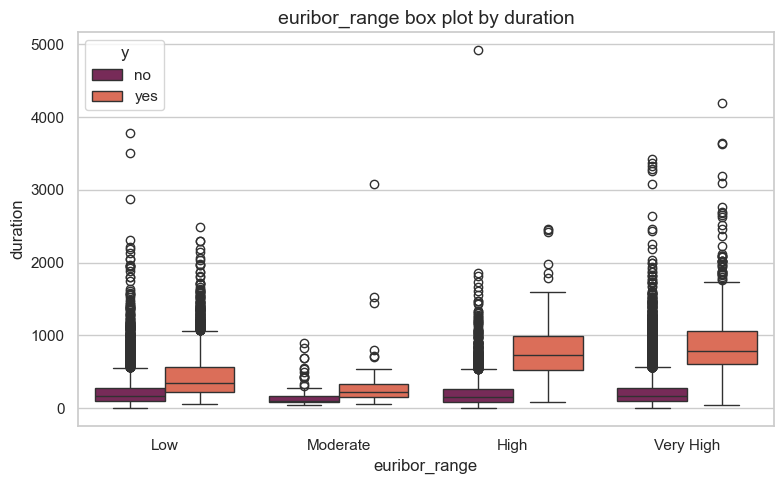

In [88]:
print("Boxplot with Outliers:")
box_plot_cat(df_clean, 'duration', 'euribor_range', hue='y')

Boxplot without Outliers (to make the boxes easier to read):


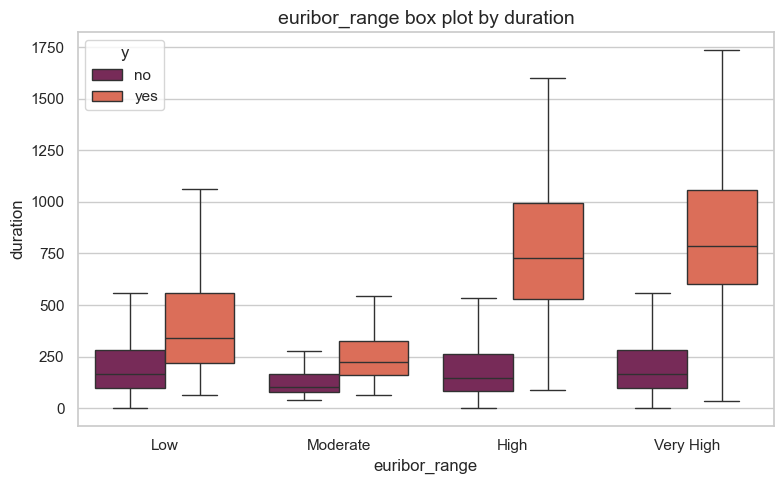

In [89]:
print("Boxplot without Outliers (to make the boxes easier to read):")
box_plot_cat(df_clean, 'duration', 'euribor_range', hue='y', showfliers=False)

In [90]:
def cat_plot(df, cat_col, hue=None):

    sns.set(style="whitegrid")
    sns.catplot(data=df,
                kind='count',
                x=cat_col,
                hue=hue,
                palette='rocket',
                height=5,
                aspect=1.2)
    plt.title(f"{cat_col}l vs {hue}", fontsize=14)
    plt.xlabel("Education Level", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

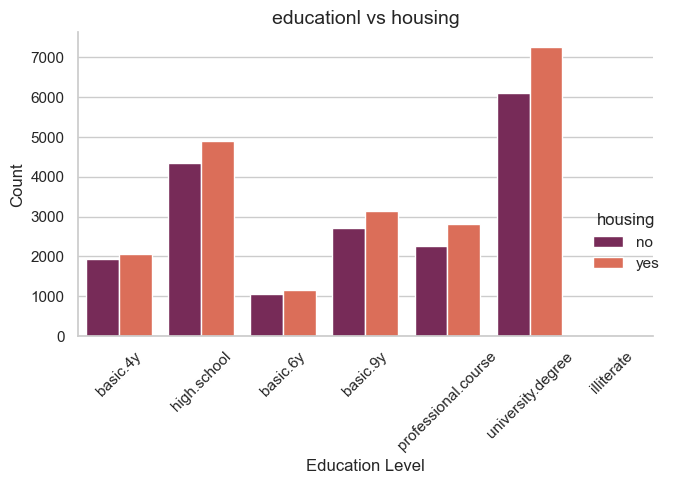

In [91]:
cat_plot(df_clean, 'education', hue='housing')

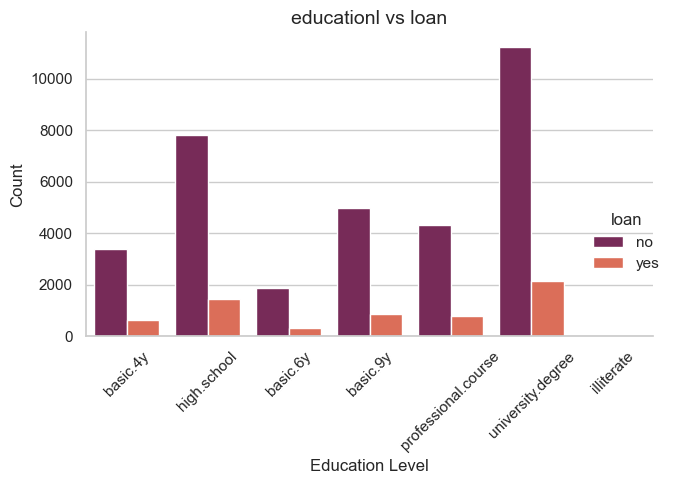

In [92]:
cat_plot(df_clean, 'education', hue='loan')

In [93]:
df_clean[['housing_bin', 'loan_bin']] = df_bin[['housing', 'loan']]

In [94]:
df_clean.groupby(['education', 'housing_bin', 'y']).size().reset_index(name='count')

,education,housing_bin,y,count
0,basic.4y,0,no,1738
1,basic.4y,0,yes,190
2,basic.4y,1,no,1852
3,basic.4y,1,yes,222
4,basic.6y,0,no,963
5,basic.6y,0,yes,84
6,basic.6y,1,no,1060
7,basic.6y,1,yes,96
8,basic.9y,0,no,2505
9,basic.9y,0,yes,216


In [95]:
df_clean.groupby(['education', 'loan_bin', 'y']).size().reset_index(name='count')

,education,loan_bin,y,count
0,basic.4y,0,no,3044
1,basic.4y,0,yes,344
2,basic.4y,1,no,546
3,basic.4y,1,yes,68
4,basic.6y,0,no,1716
5,basic.6y,0,yes,161
6,basic.6y,1,no,307
7,basic.6y,1,yes,19
8,basic.9y,0,no,4599
9,basic.9y,0,yes,382


In [96]:
df_clean.groupby('education')[['loan_bin', 'housing_bin']].mean()

,loan_bin,housing_bin
education,,
basic.4y,0.153423,0.518241
basic.6y,0.147980,0.524739
basic.9y,0.149419,0.535348
high.school,0.155070,0.530570
illiterate,0.166667,0.555556
professional.course,0.154993,0.554836
university.degree,0.160162,0.543218


In [97]:
df_clean.groupby(['education', 'housing_bin'])['y'].value_counts(normalize=True).unstack().fillna(0)

y                                      no       yes
education           housing_bin                    
basic.4y            0            0.901452  0.098548
                    1            0.892960  0.107040
basic.6y            0            0.919771  0.080229
                    1            0.916955  0.083045
basic.9y            0            0.920617  0.079383
                    1            0.923126  0.076874
high.school         0            0.894191  0.105809
                    1            0.888232  0.111768
illiterate          0            0.875000  0.125000
                    1            0.700000  0.300000
professional.course 0            0.900397  0.099603
                    1            0.875530  0.124470
university.degree   0            0.864626  0.135374
                    1            0.859463  0.140537

In [98]:
df_clean.groupby(['education', 'loan_bin'])['y'].value_counts(normalize=True).unstack().fillna(0)

y                                   no       yes
education           loan_bin                    
basic.4y            0         0.898465  0.101535
                    1         0.889251  0.110749
basic.6y            0         0.914225  0.085775
                    1         0.941718  0.058282
basic.9y            0         0.923309  0.076691
                    1         0.914286  0.085714
high.school         0         0.890113  0.109887
                    1         0.896022  0.103978
illiterate          0         0.800000  0.200000
                    1         0.666667  0.333333
professional.course 0         0.885535  0.114465
                    1         0.892405  0.107595
university.degree   0         0.860488  0.139512
                    1         0.868814  0.131186

In [99]:
df_clean[df_clean['pdays'] != 999]['pdays'].value_counts().sort_index()

pdays
0      15
1      25
2      58
3     421
4     113
5      46
6     396
7      58
8      15
9      62
10     48
11     27
12     56
13     35
14     20
15     24
16     10
17      8
18      7
19      3
20      1
21      2
22      3
25      1
26      1
27      1
Name: count, dtype: int64

In [100]:
conditions = [
    (df_clean['pdays'] == 999),
    (df_clean['pdays'] <= 6),
    (df_clean['pdays'] <= 20),
    (df_clean['pdays'] > 20)
]

labels = ['Never Contacted', 'Contacted Recently', 'Moderate Gap','Long Gap']

df_clean['pdays_range'] = np.select(conditions, labels, default='Other')

In [101]:
df_clean['pdays_range'].head()

0    Never Contacted
1    Never Contacted
2    Never Contacted
3    Never Contacted
4    Never Contacted
Name: pdays_range, dtype: object

In [102]:
df_clean['previous_calls'].head()

0    0
1    0
2    0
3    0
4    0
Name: previous_calls, dtype: category
Categories (5, object): ['0' < '1-2' < '3-4' < '5-6' < '7 or more']

In [103]:
df_clean.groupby(['pdays_range', 'previous_calls', 'y']).size().reset_index(name='count')

,pdays_range,previous_calls,y,count
0,Contacted Recently,0,no,0
1,Contacted Recently,0,yes,0
2,Contacted Recently,1-2,no,317
3,Contacted Recently,1-2,yes,577
4,Contacted Recently,3-4,no,43
5,Contacted Recently,3-4,yes,117
6,Contacted Recently,5-6,no,4
7,Contacted Recently,5-6,yes,15
8,Contacted Recently,7 or more,no,1
9,Contacted Recently,7 or more,yes,0


In [104]:
df_clean.groupby(['pdays_range', 'previous_calls'])['y'].value_counts(normalize=True).unstack().fillna(0)

y                                        no       yes
pdays_range        previous_calls                    
Contacted Recently 0               0.000000  0.000000
                   1-2             0.354586  0.645414
                   3-4             0.268750  0.731250
                   5-6             0.210526  0.789474
                   7 or more       1.000000  0.000000
Long Gap           0               0.000000  0.000000
                   1-2             0.142857  0.857143
                   3-4             0.000000  0.000000
                   5-6             0.000000  1.000000
                   7 or more       0.000000  0.000000
Moderate Gap       0               0.000000  0.000000
                   1-2             0.423676  0.576324
                   3-4             0.415094  0.584906
                   5-6             0.000000  0.000000
                   7 or more       0.000000  0.000000
Never Contacted    0               0.911234  0.088766
                   1-2             0.874233  0.125767
                   3-4             0.800000  0.200000
                   5-6             1.000000  0.000000
                   7 or more       0.000000  0.000000

In [105]:
df_clean.to_csv("updated_data.csv", sep=";", index=False)